In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-21 21:05:38--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  23.3MB/s    in 12s     

2023-05-21 21:05:51 (21.6 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



Installing Apache Spark

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz 

--2023-05-21 21:05:51--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.1’

spark-3.2.1-bin-had 100%[===================>] 260.01M  23.6MB/s    in 12s     

2023-05-21 21:06:03 (21.8 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.1’ saved [272637746/272637746]



unzip folder

In [ ]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
#now we need to install findspark library, which will find spark on the system:
!pip install -q findspark

In [ ]:
# required dependencies are done, now setting the envoironment, to run the pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
# locating spark in  the system
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
#now the actual game starts from here, we will import Sparksession, and create it, it the initial kick to spark
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
# finally we have Spark session variable. write spark and run to check is it working
spark

#Loadingv our data to PySpark

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/Big Data Management/datasets/combined-dataeda.csv", header=True, inferSchema=True)

In [ ]:
# first we will check the coloumn details 
df.columns

['userId',
 'userSessionId',
 'teamLevel',
 'platformType',
 'count_gameclicks',
 'count_hits',
 'count_buyId',
 'avg_price',
 'country',
 'adCategory',
 'price']

In [ ]:
#let have some try with data here 5 rows are showing 
#remember for Pandas we used head() but here for spark we will use show()

df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+-------+-----------+-----+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|country| adCategory|price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+-------+-----------+-----+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|     BA|electronics|    3|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|     HU|     movies|   10|
|  1589|         5650|        1|      iphone|              26|         2|       NULL|     NULL|     IS|  computers|   20|
|  1863|         5651|        1|     android|              35|         4|       NULL|     NULL|     AM|    fashion|    3|
|   937|         5652|        1|     android|              39|         0|          1|        1|     CC|   clothing|   20|
+------+-------------+--

In [ ]:
df.describe().show()

+-------+------------------+-----------------+------------------+------------+------------------+------------------+------------------+-----------------+-------+----------+------------------+
|summary|            userId|    userSessionId|         teamLevel|platformType|  count_gameclicks|        count_hits|       count_buyId|        avg_price|country|adCategory|             price|
+-------+------------------+-----------------+------------------+------------+------------------+------------------+------------------+-----------------+-------+----------+------------------+
|  count|              4619|             4619|              4619|        4619|              4619|              4619|              4619|             4619|   4619|      4619|              4619|
|   mean|1189.9647109764019|17963.06798008227| 4.355704697986577|        null|143.06300064949124|15.705780471963628|1.6832034018426647|7.214323175053155|   null|      null| 7.348560294436025|
| stddev| 691.0986309664246|7947.6811268

In [ ]:
#check if there is any duplicate value
import pyspark.sql.functions as funcs
df.groupBy(df.columns).count().where(funcs.col('count') > 1).select(funcs.sum('count')).show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
userId,4619,1189.9647109764019,691.0986309664246,0,2389
userSessionId,4619,17963.06798008227,7947.681126803095,5648,38722
teamLevel,4619,4.355704697986577,1.9246625516949587,1,8
platformType,4619,None,None,android,windows
count_gameclicks,4619,143.06300064949124,126.88339694316925,1,1207
count_hits,4619,15.705780471963628,13.986901900918744,0,121
count_buyId,4619,1.6832034018426647,0.9005088871085436,1,NULL
avg_price,4619,7.214323175053155,6.536501375588665,1,NULL
country,4619,None,None,AD,ZW


In [ ]:
df_missing = df.na.fill(0)


In [ ]:
df_missing.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
userId,4619,1189.9647109764019,691.0986309664246,0,2389
userSessionId,4619,17963.06798008227,7947.681126803095,5648,38722
teamLevel,4619,4.355704697986577,1.9246625516949587,1,8
platformType,4619,None,None,android,windows
count_gameclicks,4619,143.06300064949124,126.88339694316925,1,1207
count_hits,4619,15.705780471963628,13.986901900918744,0,121
count_buyId,4619,1.6832034018426647,0.9005088871085436,1,NULL
avg_price,4619,7.214323175053155,6.536501375588665,1,NULL
country,4619,None,None,AD,ZW


In [ ]:
df1=df_missing

In [ ]:
df1

DataFrame[userId: int, userSessionId: int, teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: string, avg_price: string, country: string, adCategory: string, price: int]

In [ ]:
# import packages
from pyspark.ml.feature import StringIndexer, OneHotEncoder
# conversion platformtype to numerical
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_num').fit(df1)
indexed_df = indexer.transform(df1)
# conversion adcategory to numerical
indexer = StringIndexer(inputCol='adCategory', outputCol='adCategory_num').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
# conversion adcategory to numerical
indexer = StringIndexer(inputCol='country', outputCol='country_num').fit(indexed_df)
df1 = indexer.transform(indexed_df)

In [ ]:
df1.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+-------+-----------+-----+----------------+--------------+-----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|country| adCategory|price|platformType_num|adCategory_num|country_num|
+------+-------------+---------+------------+----------------+----------+-----------+---------+-------+-----------+-----+----------------+--------------+-----------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|     BA|electronics|    3|             1.0|           7.0|      103.0|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|     HU|     movies|   10|             0.0|           4.0|      122.0|
|  1589|         5650|        1|      iphone|              26|         2|       NULL|     NULL|     IS|  computers|   20|             0.0|           1.0|       72.0|
|  1

In [ ]:
df2=df1.drop("adCategory","platformType","country")

In [ ]:
df2.show()

+------+-------------+---------+----------------+----------+-----------+---------+-----+----------------+--------------+-----------+
|userId|userSessionId|teamLevel|count_gameclicks|count_hits|count_buyId|avg_price|price|platformType_num|adCategory_num|country_num|
+------+-------------+---------+----------------+----------+-----------+---------+-----+----------------+--------------+-----------+
|   812|         5648|        1|              69|         8|       NULL|     NULL|    3|             1.0|           7.0|      103.0|
|  1658|         5649|        1|              31|         5|       NULL|     NULL|   10|             0.0|           4.0|      122.0|
|  1589|         5650|        1|              26|         2|       NULL|     NULL|   20|             0.0|           1.0|       72.0|
|  1863|         5651|        1|              35|         4|       NULL|     NULL|    3|             1.0|           5.0|       56.0|
|   937|         5652|        1|              39|         0|         

In [ ]:
df2.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
userId,4619,1189.9647109764019,691.0986309664246,0,2389
userSessionId,4619,17963.06798008227,7947.681126803095,5648,38722
teamLevel,4619,4.355704697986577,1.9246625516949587,1,8
count_gameclicks,4619,143.06300064949124,126.88339694316925,1,1207
count_hits,4619,15.705780471963628,13.986901900918744,0,121
count_buyId,4619,1.6832034018426647,0.9005088871085436,1,NULL
avg_price,4619,7.214323175053155,6.536501375588665,1,NULL
price,4619,7.348560294436025,7.1247441191006216,1,20
platformType_num,4619,0.9406798008226889,1.0566199434719692,0.0,4.0


In [ ]:
# if there any null value the row will be droped and the count will be shown remaining
df3 = df2.na.drop(subset=['price'])
df3.count()

4619

In [ ]:
from pyspark.sql.functions import corr
df2.select(corr("price","country_num")).show()

+------------------------+
|corr(price, country_num)|
+------------------------+
|    0.021458797807482485|
+------------------------+



<Axes: xlabel='count_gameclicks', ylabel='userSessionId'>

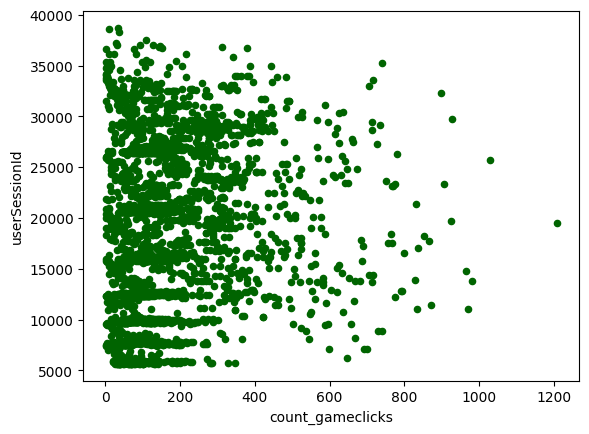

In [ ]:
df3 = df2.toPandas()
df3.plot.scatter(x='count_gameclicks', y='userSessionId', c='DarkGreen')

array([[<Axes: title={'center': 'userSessionId'}>]], dtype=object)

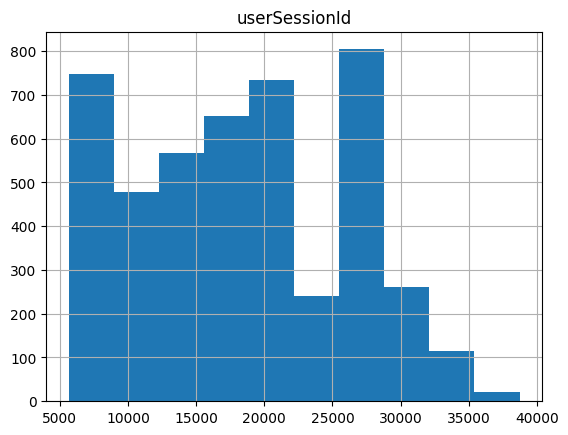

In [ ]:
df3.hist(column='userSessionId', bins=10)

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType
from pyspark.sql.functions import isnan, when, col,count,lit, regexp_extract, mean, avg, split
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (13,6)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
# File location and type
file_location = "/content/drive/MyDrive/Big Data Management/datasets/flamingo-data/user-session.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [ ]:
display(df.head(5))

[Row(timestamp='2016-05-26 14:47:30', userSessionId=5675, userId=170, teamId=90, assignmentId=5423, sessionType='start', teamLevel=1, platformType='iphone'),
 Row(timestamp='2016-05-27 00:06:54', userSessionId=5675, userId=170, teamId=90, assignmentId=5423, sessionType='end', teamLevel=1, platformType='iphone'),
 Row(timestamp='2016-05-26 14:43:09', userSessionId=5795, userId=835, teamId=39, assignmentId=5300, sessionType='start', teamLevel=1, platformType='android'),
 Row(timestamp='2016-05-27 08:06:54', userSessionId=5795, userId=835, teamId=39, assignmentId=5300, sessionType='end', teamLevel=1, platformType='android'),
 Row(timestamp='2016-05-26 14:47:20', userSessionId=5833, userId=624, teamId=2, assignmentId=5529, sessionType='start', teamLevel=1, platformType='iphone')]

In [ ]:
df.toPandas().describe()

,userSessionId,userId,teamId,assignmentId,teamLevel
count,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000
mean,17973.522595,1189.691243,72.390703,10288.336000,4.357405
std,7953.932719,691.044505,41.458779,6960.614801,1.924862
min,5648.000000,0.000000,2.000000,5002.000000,1.000000
25%,10228.000000,595.000000,36.000000,5309.000000,3.000000
50%,16712.000000,1173.000000,71.000000,6018.000000,5.000000
75%,26326.000000,1765.000000,103.000000,13947.000000,6.000000
max,38722.000000,2389.000000,179.000000,37948.000000,8.000000


In [ ]:
# conversion platformtype to numerical
indexer = StringIndexer(inputCol='sessionType', outputCol='sessionType_num').fit(df)
df1 = indexer.transform(df)

In [ ]:
df1.show()

+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|          timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|sessionType_num|
+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|2016-05-26 14:47:30|         5675|   170|    90|        5423|      start|        1|      iphone|            1.0|
|2016-05-27 00:06:54|         5675|   170|    90|        5423|        end|        1|      iphone|            0.0|
|2016-05-26 14:43:09|         5795|   835|    39|        5300|      start|        1|     android|            1.0|
|2016-05-27 08:06:54|         5795|   835|    39|        5300|        end|        1|     android|            0.0|
|2016-05-26 14:47:20|         5833|   624|     2|        5529|      start|        1|      iphone|            1.0|
|2016-05-27 23:06:54|         5833|   624|     2|        5529|        end|        1|    

In [ ]:
df3=df1.drop("sessionType")

In [ ]:
display(df1.groupBy("sessionType").count())

DataFrame[sessionType: string, count: bigint]

In [ ]:
display(df3.groupBy("platformType","sessionType_num").count())

DataFrame[platformType: string, sessionType_num: double, count: bigint]

In [ ]:
df1_pd = df.toPandas()

[Text(0.5, 0, ' Platforms'), Text(0, 0.5, 'Number  of  Sessions')]

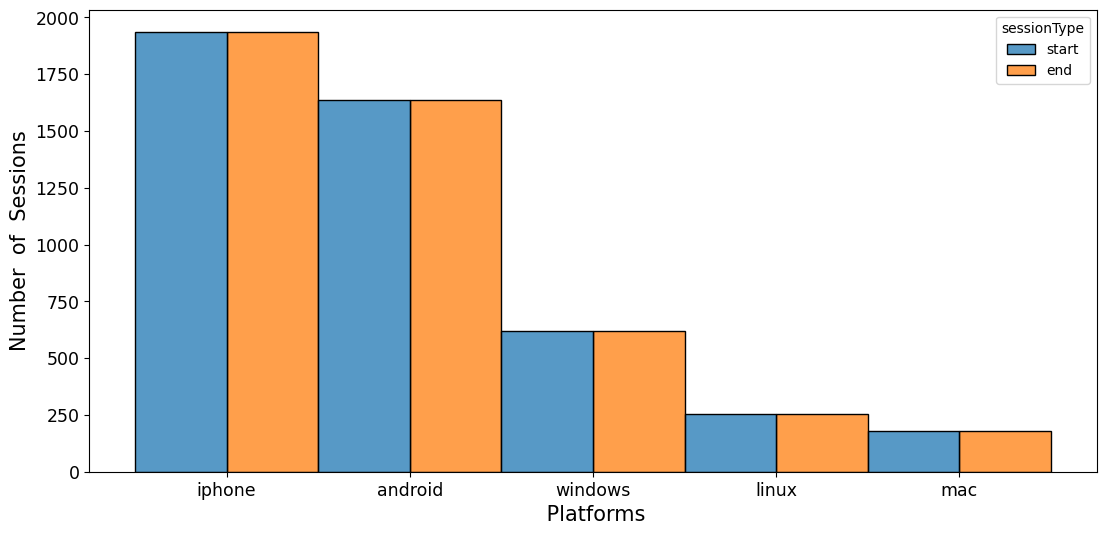

In [ ]:
plt.rcParams["axes.labelsize"] = 15
plt.tick_params(labelsize=12.5)
ax = sns.histplot(data=df1_pd, x="platformType", hue="sessionType",  multiple="dodge", bins=8)
ax.set(xlabel=' Platforms',
       ylabel='Number  of  Sessions')

In [ ]:
df1.show()


+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|          timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|sessionType_num|
+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|2016-05-26 14:47:30|         5675|   170|    90|        5423|      start|        1|      iphone|            1.0|
|2016-05-27 00:06:54|         5675|   170|    90|        5423|        end|        1|      iphone|            0.0|
|2016-05-26 14:43:09|         5795|   835|    39|        5300|      start|        1|     android|            1.0|
|2016-05-27 08:06:54|         5795|   835|    39|        5300|        end|        1|     android|            0.0|
|2016-05-26 14:47:20|         5833|   624|     2|        5529|      start|        1|      iphone|            1.0|
|2016-05-27 23:06:54|         5833|   624|     2|        5529|        end|        1|    

In [ ]:
df1.show()

+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|          timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|sessionType_num|
+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|2016-05-26 14:47:30|         5675|   170|    90|        5423|      start|        1|      iphone|            1.0|
|2016-05-27 00:06:54|         5675|   170|    90|        5423|        end|        1|      iphone|            0.0|
|2016-05-26 14:43:09|         5795|   835|    39|        5300|      start|        1|     android|            1.0|
|2016-05-27 08:06:54|         5795|   835|    39|        5300|        end|        1|     android|            0.0|
|2016-05-26 14:47:20|         5833|   624|     2|        5529|      start|        1|      iphone|            1.0|
|2016-05-27 23:06:54|         5833|   624|     2|        5529|        end|        1|    

In [ ]:
df1.show(5)

+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|          timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|sessionType_num|
+-------------------+-------------+------+------+------------+-----------+---------+------------+---------------+
|2016-05-26 14:47:30|         5675|   170|    90|        5423|      start|        1|      iphone|            1.0|
|2016-05-27 00:06:54|         5675|   170|    90|        5423|        end|        1|      iphone|            0.0|
|2016-05-26 14:43:09|         5795|   835|    39|        5300|      start|        1|     android|            1.0|
|2016-05-27 08:06:54|         5795|   835|    39|        5300|        end|        1|     android|            0.0|
|2016-05-26 14:47:20|         5833|   624|     2|        5529|      start|        1|      iphone|            1.0|
+-------------------+-------------+------+------+------------+-----------+---------+----

In [ ]:
df1_pd['teamId'] = pd.cut(df1_pd['userId'], bins=[0,7.91,14.45,31,512.33], labels=['Low','Mid_Low-Mid','Mid-Mid_High','High'])


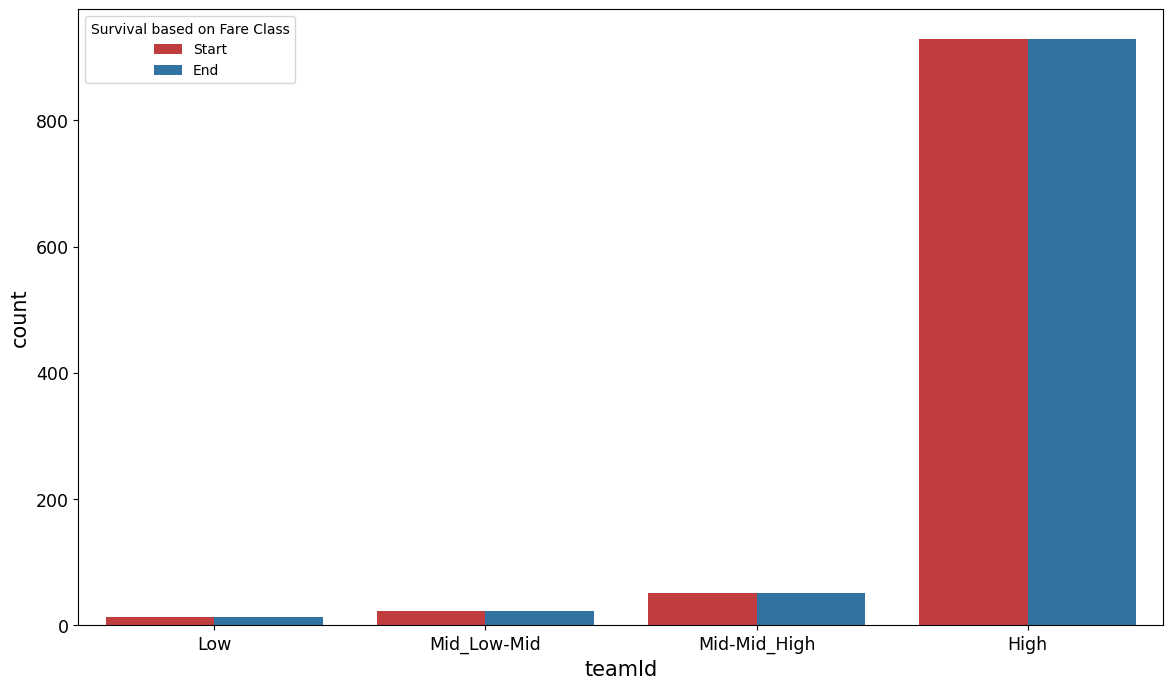

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.labelsize"] = 15
plt.tick_params(labelsize=12.5)
ax_2 = sns.countplot(x = "teamId", hue = "sessionType", data = df1_pd, palette=["C3", "C0"]).legend(labels = ["Start", "End"])
ax_2.set_title("Survival based on Fare Class")

In [ ]:

!jupyter nbconvert --to html /content/Overview_PreProcessing_Visualization_Eda_.ipynb

[NbConvertApp] Converting notebook /content/Overview_PreProcessing_Visualization_Eda_.ipynb to html
[NbConvertApp] Writing 842836 bytes to /content/Overview_PreProcessing_Visualization_Eda_.html
